# Perform linear regression and analyse results

Imports

In [1]:
from multiprocessing import Pool
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm

Load the dataset

In [2]:
data_path: Path = Path() / ".." / ".." / "ia2" / "02_linear-classification" / "data" / "Credit.csv"
assert data_path.exists(), "Could not find dataset"

In [3]:
(df := pd.read_csv(data_path))
df.Own = df.Own.map(lambda x: 1 if x == 'Yes' else 0)
df.Student = df.Student.map(lambda x: 1 if x == 'Yes' else 0)
df.Married = df.Married.map(lambda x: 1 if x == 'Yes' else 0)
regions = list(df.Region.unique())
df.Region = df.Region.map(lambda x: regions.index(x))
df

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,0,0,1,0,333
1,106.025,6645,483,3,82,15,1,1,1,1,903
2,104.593,7075,514,4,71,11,0,0,0,1,580
3,148.924,9504,681,3,36,11,1,0,0,1,964
4,55.882,4897,357,2,68,16,0,0,1,0,331
...,...,...,...,...,...,...,...,...,...,...,...
395,12.096,4100,307,3,32,13,0,0,1,0,560
396,13.364,3838,296,5,65,17,0,0,0,2,480
397,57.872,4171,321,5,67,12,1,0,1,0,138
398,37.728,2525,192,1,44,13,0,0,1,0,0


Peek at the dataset

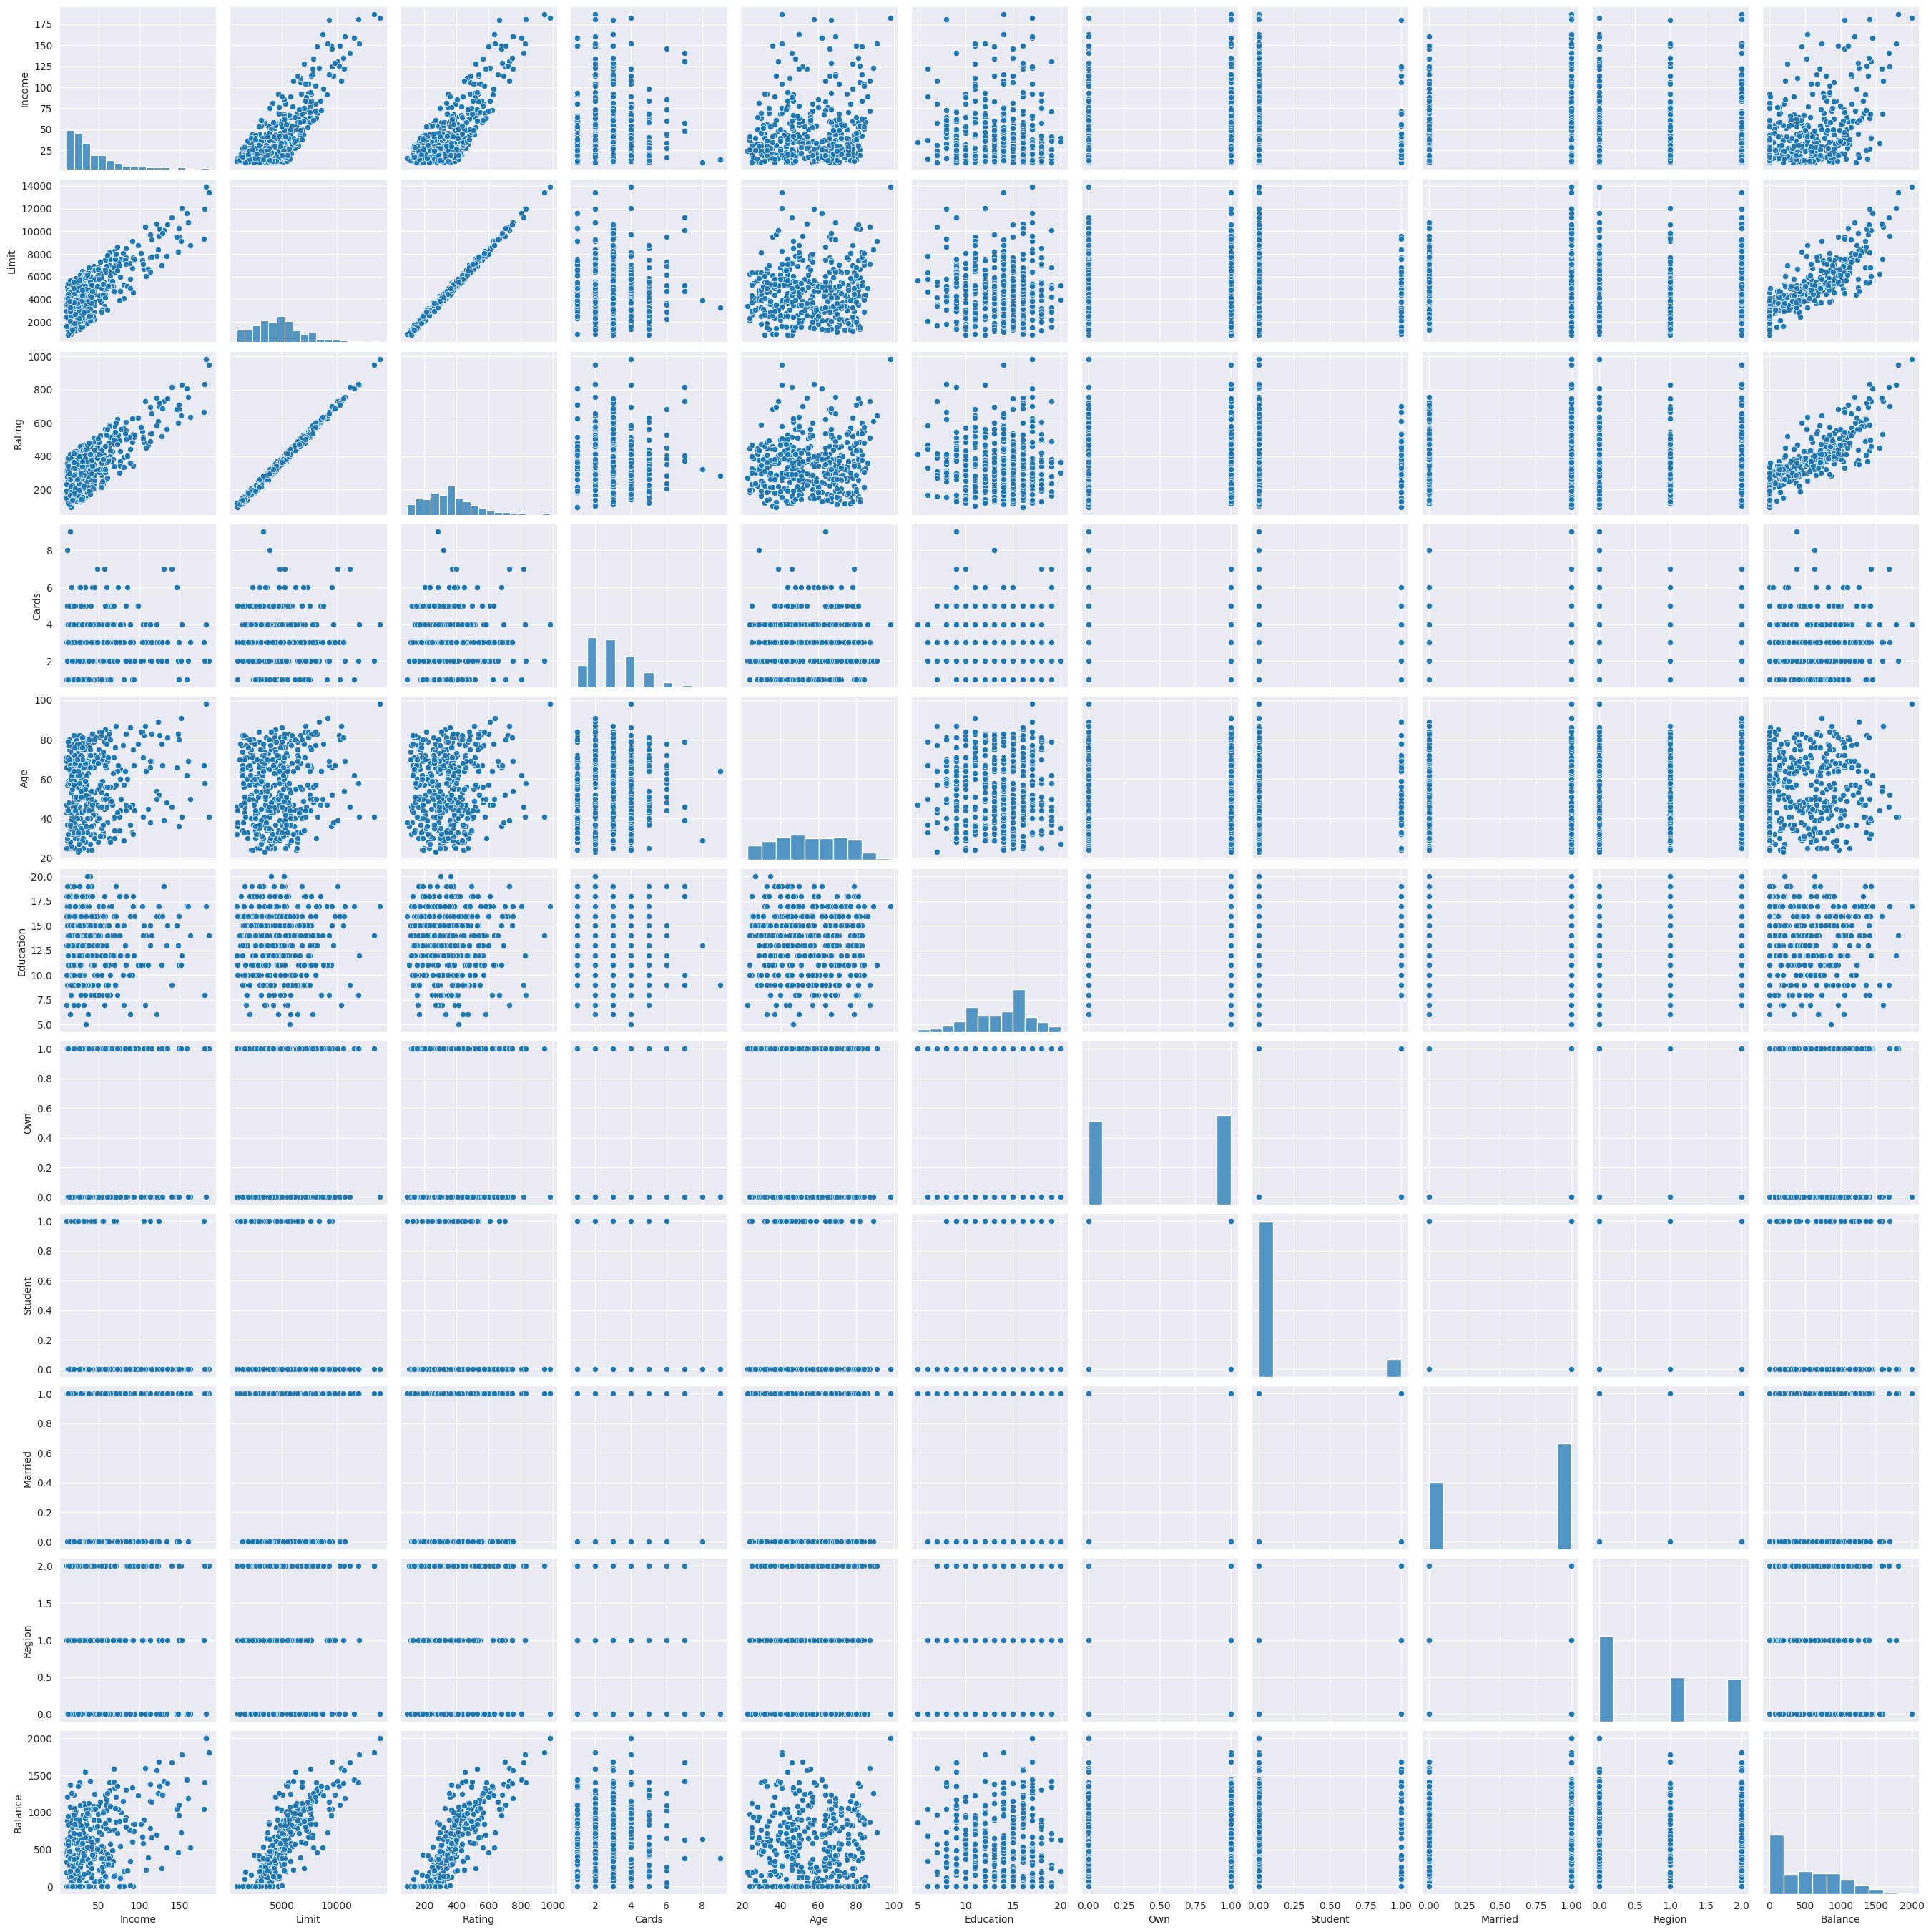

In [4]:
sns.pairplot(df)

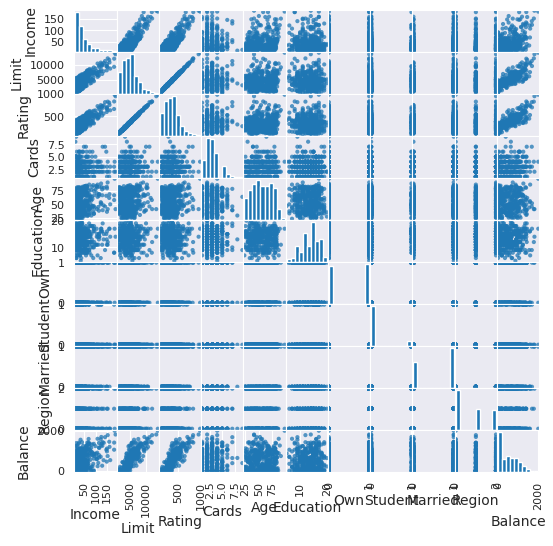

In [5]:
scatter_matrix(df, alpha=0.75, figsize=(6, 6), diagonal='hist')
plt.show()

Define helper functions

In [6]:
XType = list[tuple[float, float, float]]
YType = list[float]


def train(x: XType, y: YType) -> LogisticRegression:
    regressor = LogisticRegression()
    regressor.fit(X=x, y=y)
    return regressor


def test(regressor: LogisticRegression, x: XType, y: YType) -> float:
    return r2_score(regressor.predict(x), y)

Perform train-test split

In [20]:
full_dataset = df.drop(columns=['Married']), df['Married']

In [21]:
train(*full_dataset)

/home/federico/anaconda3/envs/main2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Experiment

Check performance